# Plot Density Profiles from DFT Calculations

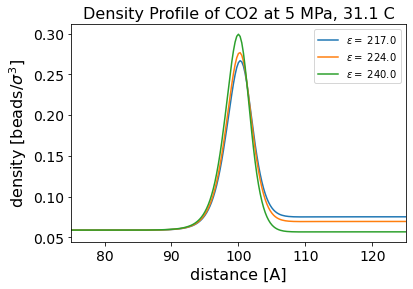

In [17]:
import os

import numpy as np
import matplotlib.pyplot as plt

dft_pred_folder = '../../../../Wang/dft_string_method/bi_surf/3k2f_60c_sensitivity/'


sub_folder_list = ['epsn_217-0/', 'epsn_224-0/', 'epsn_240-0/']

fig = plt.figure()
ax = fig.add_subplot(111)
    
for sub_folder in sub_folder_list:
    _, val_str = sub_folder.split('_')
    num, dec = val_str[:-1].split('-')
    epsn_val = float(num) + float(dec)/10**len(dec)
    data = np.genfromtxt(dft_pred_folder + sub_folder + 'rho0_4.dat')
    x = data[:,0]
    y = data[:,1]
    ax.plot(x,y, label=r'$\epsilon =$ ' + '{0:.1f}'.format(epsn_val))
    
    
ax.set_xlabel('distance [A]', fontsize=16)
ax.set_ylabel(r'density [beads/$\sigma^3$]', fontsize=16)
ax.set_title(r'Density Profile of CO2 at 5 MPa, 31.1 C', fontsize=16)
ax.tick_params(which='both', labelsize=14)
ax.set_xlim([75,125])
plt.legend()

In [1]:
import re


sub_folder = 'epsn_224-0/'
p_ind = 4


def beads_2_M(beads_per_sigma3, Mw, N, sigma):
    return beads_per_sigma3*(Mw/N)*1E24 / (6.022E23*sigma**3)

fig = plt.figure()
ax = fig.add_subplot(111)
    
# CO2
Mw_list = [44.01, 2700]
sigma_list = [2.79, 3.01]
N_list = [2, 123]
label_list = ['CO2', 'polyol']

for i, vals in enumerate(zip(Mw_list, N_list, sigma_list, label_list)):
    Mw, N, sigma, label = vals
    data = np.genfromtxt(os.path.join(dft_pred_folder, sub_folder, 'rho{0:d}_{1:d}.dat'.format(i, p_ind+1)))
    x = data[:,0]
    y = beads_2_M(data[:,1], Mw, N, sigma)
    ax.plot(x, y, label=label)
    
# gets pressure
params = np.genfromtxt(os.path.join(dft_pred_folder, sub_folder, 'blkrho.inp'))
p = params[p_ind, 0]
# gets temperature
idx = re.search(r'\d{2}c', dft_pred_folder).start()

T = int(dft_pred_folder[idx:idx+2])
ax.set_xlabel(r'distance [$\AA$]', fontsize=ax_fs)
ax.set_ylabel(r'density [g/mL]', fontsize=ax_fs)
ax.set_title(r'Density Profile at {0:.1f} MPa, {1:d} C'.format(p, T), fontsize=16)
ax.tick_params(which='both', labelsize=tk_fs)
ax.set_xlim([75,125])
plt.legend(fontsize=l_fs)

NameError: name 'plt' is not defined